> 提示：项目 Notebook 模板主要为了帮助同学了解如何划分报告结构，提示项目的注意事项。如果你理解项目的所有要求，那么完全可以自己创建新的 Notebook 来完成报告。

> 提交项目时，建议删除所有提示性文字，只保留你自己的 Markdown 说明文字和代码注释。

# 清理与分析数据（Twitter推主WeRateDogs 狗狗评分研究 ）
## 收集

In [467]:
# 导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

% matplotlib inline

> 提示：你需要收集的文件有：
1. 收集手头文件 `twitter_archive_enhanced.csv`，其中包含了一些主要的推特信息，是本次清洗的主要数据，其中的评分、地位和名字等数据是从 `text` 原文中提取的，但是提取的并不好，评分并不都是正确的，狗的名字和地位也有不正确的 。**如果你想用评分、地位和名字进行分析和可视化，需要评估和清洗这些列。完成这些列的评估和清洗，你可以学到更加实用的技能。**
2. 编程下载收集互联网文件：`image-predictions.tsv`，其中包含了推特图像预测信息，根据推特中的图片预测出狗狗种类；
3. 查询 API 收集额外推特信息 `tweet_json.txt`，如果你无法访问 Twitter 的话，可以直接读取项目可供下载的 `tweet_json.txt` 文件，从中提取所需数据。至少需要提取转发数（`retweet_count`）和喜欢数（`favorite_count`）这两列，**如果你的分析中不需要用到其他列，则不需要收集其他列**。如果提取了其他列只用于清洗，那么这样的清洗没有意义。

In [468]:
# 收集文件 1 保存为 dataframe
twitter_dog = pd.read_csv('twitter-archive-enhanced.txt')

In [469]:
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)

In [470]:
with open('image_predictions.tsv','w') as f:
    f.write(response.text)

In [471]:
# 收集文件 2 保存为 dataframe
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [472]:
# 收集文件 3 保存为 dataframe
#with open('tweet_json.txt', 'r') as f:
#    for line in f.readlines():
#        df3 = json.loads(line)
extra_twitter = pd.read_json('tweet_json.txt', lines=True, dtype=True)

## 评估
### 目测评估

In [473]:
pd.set_option('max_colwidth',200)

In [474]:
twitter_dog

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [475]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [476]:
extra_twitter

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com...",39492,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.co...",33786,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.co...",25445,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,...,0.0,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com...",42863,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,...,0.0,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138

### 编程评估

In [477]:
twitter_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [478]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [479]:
extra_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [480]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [481]:
twitter_dog.in_reply_to_user_id.value_counts().index

Float64Index([         4196983835.0,            21955058.0,
              7.305050141505823e+17,            29166305.0,
                       3105440746.0,           291859009.0,
                        279280991.0,          2319108198.0,
                        180670967.0,            30582082.0,
                         26259576.0,           194351775.0,
                        358972768.0, 8.405478643549184e+17,
                       2894131180.0,            21435658.0,
                       2281181600.0,            16487760.0,
                       4717297476.0,            28785486.0,
                       1582853809.0,           467036706.0,
                         47384430.0,            13615722.0,
                         15846407.0,            20683724.0,
                         16374678.0,            11856342.0,
                       1198988510.0,           113211856.0,
                         77596200.0],
             dtype='float64')

In [482]:
twitter_dog.retweeted_status_id

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19      8.874740e+17
20               NaN
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
            ...     
2326             NaN
2327             NaN
2328             NaN
2329             NaN
2330             NaN
2331             NaN
2332             NaN
2333             NaN
2334             NaN
2335             NaN
2336             NaN
2337             NaN
2338             NaN
2339             NaN
2340             NaN
2341             NaN
2342         

In [483]:
image_prediction[image_prediction.jpg_url=='https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1638,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True


In [484]:
image_prediction.query('jpg_url=="https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg"')
# query简单好多啊

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1209,742423170473463808,https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg,1,pug,0.99731,True,Brabancon_griffon,0.001186,True,French_bulldog,0.000428,True
1476,780496263422808064,https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg,1,pug,0.99731,True,Brabancon_griffon,0.001186,True,French_bulldog,0.000428,True


In [485]:
extra_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [486]:
twitter_dog.query('rating_denominator!=10 | rating_numerator > 20')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [487]:
twitter_dog.loc[2270].values

array([667502640335572993, nan, nan, '2015-11-20 00:40:05 +0000',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       'Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl',
       nan, nan, nan,
       'https://twitter.com/dog_rates/status/667502640335572993/photo/1',
       11, 10, 'Hall', 'None', 'None', 'None', 'None'], dtype=object)

In [488]:
twitter_dog.text.str.extract(r'(\bfloofe?r?s?\b)')[0].notnull().sum()

10

In [489]:
a = twitter_dog.text.str.extract(r'(doggo)?(pupper)?(puppo)?(floof)?')
a[0].notnull().sum()

0

> 提示：
- 完成目测评估和编程评估之后，总结列出你发现的三个数据集中的所有问题；
- 每个问题都要有对应的一句话或几句话描述；
- 最终至少要包含 8 个质量问题和 2 个整洁度问题。

#### 质量
##### `twitter_dog` 表格
- 数据集中有转发的，而我们需要的是原始评级，不包括转发
- 错误的数据类型（timestamp，大部分id列）
- 部分来自text的rating_denominator 和 rating_numerator解析错误
- rating_denominator分母有些不为10，主要是多个狗的图一起打分所致
- source这一列应该简洁表示，如iphone等，数据类型为category
- doggo、floofer、pupper、puppo四个列的缺失数据格式设置不对， 应该为category
- twitter中有一个负分的评分（667550882905632768），这个不是狗，需要删除
- floof类别太少，需要重新筛选

##### `image_prediction` 表格
- jpg_url中有重复的数据
- 'id','id_str'重复，而且有的观察两列数据不一致

##### `extra_twitter` 表格
- `contributors`,`coordinates`,`geo`等多列为空值
- 'id','id_str'重复，而且有的观察两列数据不一致
- favoriate_count有很多值为0，这是不正常的，在retweeted_status中需要重新解析


#### 整洁度
- `twitte_dog`表中的doggo、floofer、pupper、puppo四个列应该整合为一列
- `extra_twitter`中的转发和喜欢添加到`twitter_dog`表格中
- `image_prediction`中的jpg_url一列应该加入到twitter_dog中


## 清理

> 提示：
- 清理数据集之前需要先备份数据集；
- 按照下面示例的结构：**定义-代码-测试**，对提出的每个问题进行清洗。

In [490]:
# 备份三个数据集
twitter_dog_clean = twitter_dog.copy()
image_prediction_clean = image_prediction.copy()
extra_twitter_clean = extra_twitter.copy()

### 缺失数据
#### `twitter_dog`floofer列需要重新筛选

##### 定义
从text中提取floof

##### 代码

In [491]:
twitter_dog_clean.floofer = twitter_dog_clean.text.str.extract(r'\b(floof)e?r?s?\b')
twitter_dog_clean.rename(columns={'floofer':'floof'}, inplace=True)

#### 测试

In [492]:
twitter_dog_clean[twitter_dog_clean.floof.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,floof,None,None
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,None,floof,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,floof,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/800388270626521089/photo/1,https://twitter.com/dog_rates/status/800388270626521089/photo/1,https://twitter.com/dog_rates/status/800388270626521089/photo/1",12,10,Doc,None,floof,None,None
622,796080075804475393,NaN,NaN,2016-11-08 20:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796080075804475393/photo/1,12,10,Yogi,None,floof,None,None
740,780543529827336192,NaN,NaN,2016-09-26 23:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780543529827336192/photo/1,12,10,None,None,floof,None,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/776218204058357768/photo/1",13,10,None,None,floof,None,None
959,751251247299190784,NaN,NaN,2016-07-08 03:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gilbert. He's being chased by a battalion of miniature floof cows. 10/10 we all believe in you Gilbert https://t.co/wayKZkDRTG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751251247299190784/video/1,10,10,Gilbert,None,floof,None,None
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid by @categoen) https://t.co/6ZRoZUWFmd,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floof,None,None
1597,686050296934563840,NaN,NaN,2016-01-10 05

#### `twitter_dog`doggo、floofer、pupper、puppo四个列的缺失数据格式设置不对

##### 定义
用replace方法把‘None’替换为np.nan

##### 代码

In [493]:
twitter_dog_clean.loc[:,'doggo':] = twitter_dog_clean.loc[:,'doggo':].replace('None', np.nan)

##### 测试

In [494]:
twitter_dog_clean.loc[:,'doggo':].head()

,doggo,floof,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


#### `extra_twitter`favoriate_count有很多值为0，这是不正常的，在retweeted_status中需要重新解析

##### 定义
从retweeted_status一列中解析数据

##### 代码

In [495]:
indexes = extra_twitter_clean[extra_twitter.favorite_count==0].retweeted_status.index
for index in indexes:
    favorite = extra_twitter_clean.loc[index, 'retweeted_status']['favorite_count']
    extra_twitter_clean.loc[index, 'favorite_count'] = favorite

#### 测试

In [496]:
extra_twitter_clean.favorite_count.value_counts()

3155      3
3508      3
1526      3
343       3
5526      3
465       3
171       3
14506     3
3548      3
689       3
520       3
1753      3
2417      3
711       2
27290     2
27474     2
23469     2
2908      2
95138     2
920       2
41876     2
26494     2
8955      2
7990      2
2651      2
35709     2
106634    2
2964      2
4973      2
7243      2
         ..
2381      1
4687      1
35406     1
21069     1
16917     1
2582      1
537       1
43546     1
4635      1
4639      1
9118      1
25123     1
4645      1
667       1
551       1
2602      1
2604      1
559       1
4657      1
1665      1
4665      1
23100     1
8769      1
1671      1
39492     1
1498      1
5773      1
10824     1
1046      1
15858     1
Name: favorite_count, Length: 2051, dtype: int64

### 清洁度

#### `twitte_dog`表中的doggo、floofer、pupper、puppo四个列应该整合为一列

##### 定义
用melt方法将四个称谓整合成‘stage’一列

##### 代码

In [497]:
s = list(twitter_dog_clean)[:-4]
a = twitter_dog_clean.melt(id_vars=s, var_name='stage_',value_name='stage')
a = a.loc[:,['tweet_id', 'stage']]
a = a[a.stage.notnull()]
twitter_dog_clean = twitter_dog_clean.iloc[:,:-4]
twitter_dog_clean = pd.merge(twitter_dog_clean, a, on='tweet_id', how='left')
#c = b[b.tweet_id.duplicated()]

#### 测试

In [498]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2369 entries, 0 to 2368
Data columns (total 14 columns):
tweet_id                      2369 non-null int64
in_reply_to_status_id         79 non-null float64
in_reply_to_user_id           79 non-null float64
timestamp                     2369 non-null object
source                        2369 non-null object
text                          2369 non-null object
retweeted_status_id           183 non-null float64
retweeted_status_user_id      183 non-null float64
retweeted_status_timestamp    183 non-null object
expanded_urls                 2310 non-null object
rating_numerator              2369 non-null int64
rating_denominator            2369 non-null int64
name                          2369 non-null object
stage                         394 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 277.6+ KB


In [499]:
twitter_dog_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
915,758099635764359168,NaN,NaN,2016-07-27 00:40:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",In case you haven't seen the most dramatic sneeze ever... 13/10 https://t.co/iy7ylyZcsE,NaN,NaN,NaN,https://vine.co/v/hQJbaj1VpIz,13,10,None,NaN
203,853639147608842240,NaN,NaN,2017-04-16 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",A photographer took pictures before and after he told his bunny he's a good boy. Here are the results. 13/10 https://t.co/wiQZIsaWUe,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/853639147608842240/photo/1,https://twitter.com/dog_rates/status/853639147608842240/photo/1",13,10,None,NaN
1437,697990423684476929,NaN,NaN,2016-02-12 03:47:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Doug. He's a Draconian Jabbawockee. Rad tongue. Ears are borderline legendary 11/10 would pet with a purpose https://t.co/MVvbQW88Pv,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/697990423684476929/photo/1,https://twitter.com/dog_rates/status/697990423684476929/photo/1,https://twitter.com/dog_rates/status/697990423684476929/photo/1",11,10,Doug,NaN
2169,669597912108789760,NaN,NaN,2015-11-25 19:25:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Skye. He is a Bretwaldian Altostratus. Not amused at all. Just saved small dog from avalanche. 10/10 hero af https://t.co/XmCvma01fF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669597912108789760/photo/1,10,10,Skye,NaN
1391,701570477911896070,NaN,NaN,2016-02-22 00:53:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Yoda. He's a Zimbabwean Rutabaga. Freaks out if u stop scratching his belly. Incredibly self-centered. 9/10 https://t.co/yVdMsVYHIx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/701570477911896070/photo/1,https://twitter.com/dog_rates/status/701570477911896070/photo/1",9,10,Yoda,NaN


#### `image_prediction`中的jpg_url一列应该加入到twitter_dog中

##### 定义
选取`image_prediction`中的jpg_url列添加到`twitter_dog`表格中，连接方式改为inner，因为我们需要的是有图片的评分。

##### 代码

In [500]:
twitter_dog_clean = pd.merge(twitter_dog_clean,image_prediction_clean[['tweet_id','jpg_url']],on='tweet_id',how='inner')

#### 测试

In [501]:
twitter_dog_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


#### `extra_twitter`中的转发和喜欢两列添加到`twitter_dog`表格中

##### 定义
选取`extra_twitter`中的'favorite_count','retweet_count'两列添加到`twitter_dog`表格中

##### 代码

In [502]:
extra_twitter_clean = extra_twitter_clean[['id','favorite_count','retweet_count']].rename(columns={'id':'tweet_id'})
twitter_dog_clean = pd.merge(twitter_dog_clean,extra_twitter_clean, on='tweet_id',how='inner')

##### 测试

In [503]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2084
Data columns (total 17 columns):
tweet_id                      2085 non-null int64
in_reply_to_status_id         24 non-null float64
in_reply_to_user_id           24 non-null float64
timestamp                     2085 non-null object
source                        2085 non-null object
text                          2085 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2085 non-null object
rating_numerator              2085 non-null int64
rating_denominator            2085 non-null int64
name                          2085 non-null object
stage                         335 non-null object
jpg_url                       2085 non-null object
favorite_count                2085 non-null int64
retweet_count                 2085 non-null int64
dtypes: float64(4), int64(5), object(8

### 质量
#### `twitter_dog` 错误的数据类型（timestamp）

##### 定义
把timestamp相关的列转换为datetime类型，涉及到id的列转换为int,这里将np.nan转换为0。

##### 代码

In [504]:
twitter_dog_clean.timestamp = pd.to_datetime(twitter_dog_clean.timestamp)
#twitter_dog_clean.retweeted_status_timestamp = pd.to_datetime(twitter_dog_clean.retweeted_status_timestamp)

In [505]:
#twitter_dog_clean.in_reply_to_status_id.replace(np.nan, 0, inplace=True)
#def to_int(df, col):
#    return int(df[col])
id_list = ['in_reply_to_status_id', 'in_reply_to_user_id',
          'retweeted_status_user_id','retweeted_status_id']
for col in id_list:
    twitter_dog_clean[col].replace(np.nan, 0, inplace=True)
    twitter_dog_clean[col] = twitter_dog_clean[col].astype(np.int64)
    #twitter_dog_clean.apply(to_int, axis=1, col=col)

#### 测试

In [506]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2084
Data columns (total 17 columns):
tweet_id                      2085 non-null int64
in_reply_to_status_id         2085 non-null int64
in_reply_to_user_id           2085 non-null int64
timestamp                     2085 non-null datetime64[ns]
source                        2085 non-null object
text                          2085 non-null object
retweeted_status_id           2085 non-null int64
retweeted_status_user_id      2085 non-null int64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2085 non-null object
rating_numerator              2085 non-null int64
rating_denominator            2085 non-null int64
name                          2085 non-null object
stage                         335 non-null object
jpg_url                       2085 non-null object
favorite_count                2085 non-null int64
retweet_count                 2085 non-null int64
dtypes: datetime64[ns](1), int



#### `twitter_dog` 数据集中有转发的，而我们需要的是原始评级，不包括转发

##### 定义
删除retweet转发非零的行，删除转发相关的三个列

##### 代码

In [507]:
twitter_dog_clean = twitter_dog_clean.query('retweeted_status_id==0')
#twitter_dog_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

In [508]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 0 to 2084
Data columns (total 17 columns):
tweet_id                      2004 non-null int64
in_reply_to_status_id         2004 non-null int64
in_reply_to_user_id           2004 non-null int64
timestamp                     2004 non-null datetime64[ns]
source                        2004 non-null object
text                          2004 non-null object
retweeted_status_id           2004 non-null int64
retweeted_status_user_id      2004 non-null int64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2004 non-null object
rating_numerator              2004 non-null int64
rating_denominator            2004 non-null int64
name                          2004 non-null object
stage                         318 non-null object
jpg_url                       2004 non-null object
favorite_count                2004 non-null int64
retweet_count                 2004 non-null int64
dtypes: datetime64[ns](1), int6

In [509]:
twitter_dog_clean.drop(['retweeted_status_id','retweeted_status_id','retweeted_status_timestamp'],
                      axis=1, inplace=True)

##### 测试

In [510]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 0 to 2084
Data columns (total 15 columns):
tweet_id                    2004 non-null int64
in_reply_to_status_id       2004 non-null int64
in_reply_to_user_id         2004 non-null int64
timestamp                   2004 non-null datetime64[ns]
source                      2004 non-null object
text                        2004 non-null object
retweeted_status_user_id    2004 non-null int64
expanded_urls               2004 non-null object
rating_numerator            2004 non-null int64
rating_denominator          2004 non-null int64
name                        2004 non-null object
stage                       318 non-null object
jpg_url                     2004 non-null object
favorite_count              2004 non-null int64
retweet_count               2004 non-null int64
dtypes: datetime64[ns](1), int64(8), object(6)
memory usage: 250.5+ KB


#### `twitter_dog` 中有一个负分的评分（667550882905632768），这个不是狗，需要删除

##### 定义
删除id是667550882905632768的行

##### 代码

In [511]:
twitter_dog_clean = twitter_dog_clean[twitter_dog_clean.tweet_id!=667550882905632768]

#### 测试

In [512]:
twitter_dog_clean.query('tweet_id==667550882905632768')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,favorite_count,retweet_count



#### `image_prediction`jpg_url中有重复的数据

##### 定义
使用drop_duplicated()方法去掉重复的行

##### 代码

In [513]:
twitter_dog_clean.drop_duplicates(subset='jpg_url', inplace=True)

#### 测试

In [514]:
sum(twitter_dog_clean.jpg_url.duplicated())

0

#### `twitter_dog` 部分来自text的rating_denominator 和 rating_numerator解析错误

##### 定义
重新从'text'提取数值，对于群体的打分以及其他的选择丢弃数据(丢弃的数据中，大部分是群体打分)

##### 代码

In [515]:
#twitter_dog_clean['last_score'] = twitter_dog_clean['text'].str.findall('((?:\d+\.)?\d+/[1-9]+[0]+)').apply(lambda x: x[-1] if len(x) > 0 else x)
#rating = twitter_dog_clean['last_score'].str.split('/',n=1, expand=True)
# 提取出来的结果是个 dataframe 数据集，有两列，分别命名为分子和分母
#rating.columns = ['rating_numerator', 'rating_denominator']
#twitter_dog_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
#twitter_dog_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

# 新的分子等于”原来的分子 / 原来的分母 * 10“
#twitter_dog_clean['rating_numerator']  = twitter_dog_clean['rating_numerator'] / twitter_dog_clean['rating_denominator'] *10
# 将分子修改完毕后，可以直接为分母赋值为 10
#twitter_dog_clean['rating_denominator'] = 10

In [516]:
tmp = twitter_dog_clean['text'].str.findall('((?:\d+\.)?\d+/10)').apply(lambda x:x[-1] if len(x)>0 else x)
rating = tmp.str.split('/', n=1, expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
twitter_dog_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
twitter_dog_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

In [517]:
#twitter_dog_clean['score'] = twitter_dog_clean.text.str.findall(r'((?:\d+\.)?\d+/[1-9]+[0]+)')
#twitter_dog_clean['score_counts'] = twitter_dog_clean.score.apply(lambda x: len(set(x)))
#twitter_dog_clean.query('score_counts>1')[['text','scores','score_counts']]

In [518]:
#rating = twitter_dog_clean['text'].str.extract(r'((?:\d+\.)?\d+)/(10)', expand=True)
#rating.columns = ['rating_numerator', 'rating_denominator']
#twitter_dog_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
#twitter_dog_clean['rating_denominator'] = rating['rating_denominator'].astype(float)
#twitter_dog_clean.rating_denominator = twitter_dog_clean['text'].str.extract(r'\d+/(10)')
#twitter_dog_clean = twitter_dog_clean[twitter_dog_clean.rating_denominator=='10']
#twitter_dog_clean.rating_numerator = twitter_dog_clean.rating_numerator.astype(float)
#twitter_dog_clean.rating_denominator = twitter_dog_clean.rating_denominator.astype(int)

##### 测试

In [519]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2084
Data columns (total 15 columns):
tweet_id                    1994 non-null int64
in_reply_to_status_id       1994 non-null int64
in_reply_to_user_id         1994 non-null int64
timestamp                   1994 non-null datetime64[ns]
source                      1994 non-null object
text                        1994 non-null object
retweeted_status_user_id    1994 non-null int64
expanded_urls               1994 non-null object
rating_numerator            1981 non-null float64
rating_denominator          1981 non-null float64
name                        1994 non-null object
stage                       308 non-null object
jpg_url                     1994 non-null object
favorite_count              1994 non-null int64
retweet_count               1994 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 249.2+ KB


In [520]:
twitter_dog_clean.query('rating_numerator==11.26')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
1463,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [521]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2084
Data columns (total 15 columns):
tweet_id                    1994 non-null int64
in_reply_to_status_id       1994 non-null int64
in_reply_to_user_id         1994 non-null int64
timestamp                   1994 non-null datetime64[ns]
source                      1994 non-null object
text                        1994 non-null object
retweeted_status_user_id    1994 non-null int64
expanded_urls               1994 non-null object
rating_numerator            1981 non-null float64
rating_denominator          1981 non-null float64
name                        1994 non-null object
stage                       308 non-null object
jpg_url                     1994 non-null object
favorite_count              1994 non-null int64
retweet_count               1994 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 249.2+ KB


#### `twitter_dog` source这一列应该简洁表示，如iphone等，数据类型为category

##### 定义
从source中选取来源，转为category列

##### 代码

In [522]:
twitter_dog_clean.source = twitter_dog_clean.source.str.extract(r'>(.+)</a>')

In [523]:
twitter_dog_clean.source = twitter_dog_clean.source.astype('category')

##### 测试

In [524]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2084
Data columns (total 15 columns):
tweet_id                    1994 non-null int64
in_reply_to_status_id       1994 non-null int64
in_reply_to_user_id         1994 non-null int64
timestamp                   1994 non-null datetime64[ns]
source                      1994 non-null category
text                        1994 non-null object
retweeted_status_user_id    1994 non-null int64
expanded_urls               1994 non-null object
rating_numerator            1981 non-null float64
rating_denominator          1981 non-null float64
name                        1994 non-null object
stage                       308 non-null object
jpg_url                     1994 non-null object
favorite_count              1994 non-null int64
retweet_count               1994 non-null int64
dtypes: category(1), datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 235.7+ KB


#### `twitter_dog`中有重复的tweet_id，主要是text中有多个描述狗地位的词，这个手动清理

##### 定义
因为重复的很少，而且很多有迷惑性，所以选择删除重复的（同一个id都删除）

##### 代码

In [525]:
#for id in twitter_dog_clean[twitter_dog_clean.tweet_id.duplicated()].tweet_id:
#    #twitter_dog_clean.drop()
#    twitter_dog_clean = twitter_dog_clean[twitter_dog_clean.tweet_id!=id]

In [526]:
## 改进的代码

twitter_dog_clean.drop_duplicates(subset='tweet_id', keep=False, inplace=True)

#### 测试

In [527]:
#for id in twitter_dog_clean[twitter_dog_clean.tweet_id.duplicated()].tweet_id:
#    print(twitter_dog_clean[twitter_dog_clean.tweet_id==id][['tweet_id','text','stage']].values)
#    print(twitter_dog_clean[twitter_dog_clean.tweet_id==id][['tweet_id','text','stage']].index)

#twitter_dog_clean.drop(twitter_dog_clean.index[188, 198, 459, 577, 708, ])
#twitter_dog_clean.drop(twitter_dog_clean.index[531,532, 566,567, 737,738,  ])
sum(twitter_dog_clean.tweet_id.duplicated())

0

#### `twitter_dog`中doggo、floofer、pupper、puppo四个列的缺失数据格式设置不对， 应该为category

##### 定义
stage这一列转换为category格式

##### 代码

In [528]:
twitter_dog_clean.stage = twitter_dog_clean.stage.astype('category')

#### 测试

In [529]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2084
Data columns (total 15 columns):
tweet_id                    1994 non-null int64
in_reply_to_status_id       1994 non-null int64
in_reply_to_user_id         1994 non-null int64
timestamp                   1994 non-null datetime64[ns]
source                      1994 non-null category
text                        1994 non-null object
retweeted_status_user_id    1994 non-null int64
expanded_urls               1994 non-null object
rating_numerator            1981 non-null float64
rating_denominator          1981 non-null float64
name                        1994 non-null object
stage                       308 non-null category
jpg_url                     1994 non-null object
favorite_count              1994 non-null int64
retweet_count               1994 non-null int64
dtypes: category(2), datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 222.3+ KB


### 存储清理后的主数据集

In [530]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件

In [531]:
twitter_dog_clean.to_csv('twitter_archive_master.csv',index=False)

## 分析和可视化
> 提示：
- 在 Notebook 使用 pandas 或 SQL 分析主数据集，并生成至少三（3）个独立的结论。
- 在 Notebook 中使用 Python 绘图库或在 Tableau 中至少生成一（1）个可视化图表。

In [532]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题-设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [533]:
# 分析或可视化代码
df = pd.read_csv('twitter_archive_master.csv',parse_dates=['timestamp'], index_col='timestamp')
#df.timestamp = pd.to_datetime(df.timestamp)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1994 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 14 columns):
tweet_id                    1994 non-null int64
in_reply_to_status_id       1994 non-null int64
in_reply_to_user_id         1994 non-null int64
source                      1994 non-null object
text                        1994 non-null object
retweeted_status_user_id    1994 non-null int64
expanded_urls               1994 non-null object
rating_numerator            1981 non-null float64
rating_denominator          1981 non-null float64
name                        1994 non-null object
stage                       308 non-null object
jpg_url                     1994 non-null object
favorite_count              1994 non-null int64
retweet_count               1994 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 233.7+ KB


In [534]:
df[df.rating_numerator>1000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,favorite_count,retweet_count
timestamp,,,,,,,,,,,,,,
2016-07-04 15:00:45,749981277374128128,0,0,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,0,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,5594,2769


### 总体情况

In [535]:
df.describe().iloc[:,-4:]

,rating_numerator,rating_denominator,favorite_count,retweet_count
count,1981.000000,1981.0,1994.000000,1994.000000
mean,11.638455,10.0,8923.133400,2770.021063
std,40.773874,0.0,12400.238808,4715.961325
min,0.000000,10.0,81.000000,15.000000
25%,10.000000,10.0,1972.250000,622.250000
50%,11.000000,10.0,4117.000000,1348.500000
75%,12.000000,10.0,11275.500000,3202.750000
max,1776.000000,10.0,132318.000000,79116.000000


In [536]:
#3981 + (11045-1855)*1.5 = 17766
1311 + (3144-590.5)*1.5

5141.25

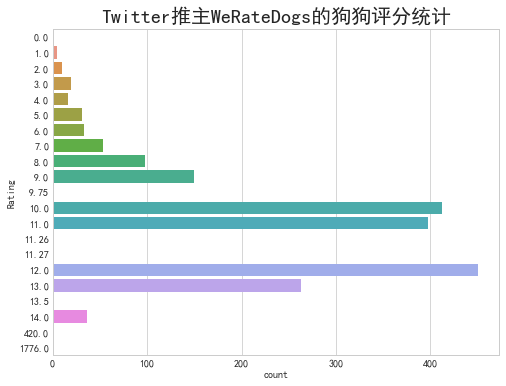

In [537]:
# Draw plot
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df, y='rating_numerator')
sns.set_style("whitegrid")

# Decorations
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题-设置字体为黑体
plt.title("Twitter推主WeRateDogs的狗狗评分统计",size=20)
plt.ylabel('Rating')
plt.savefig('dog_rating.png',dpi=200)
plt.show()


In [538]:
#15及以上的部分分布
df.query('rating_numerator>14')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,favorite_count,retweet_count
timestamp,,,,,,,,,,,,,,
2016-07-04 15:00:45,749981277374128128,0,0,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,0,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,5594,2769
2015-11-29 05:52:33,670842764863651840,0,0,Twitter for iPhone,After so many requests... here you go.\r\n\r\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,0,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,None,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,25673,9509


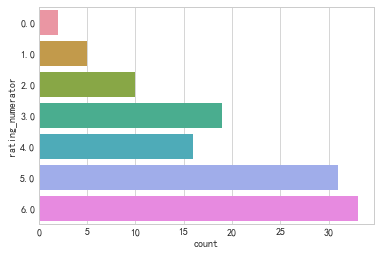

In [539]:
sns.countplot(data=df.query('rating_numerator<7'), y='rating_numerator')


#### 评分的分布情况
- 评分中最高的有1776，非常高，对平均数产生了影响
- 中位数是11，四分位分别是10,12，也就是说一般打分在在10-12分之间
- 异常值为大于15和小于7的值

#### 喜欢数的分布情况
- 喜欢数最高132318,最低52，相差还是很大的
- 中位数是3981，平均为8708

#### 转发数的分布情况
- 最高79116，最低0
- 中位数为1311，平均2730

### 狗的地位

In [540]:
 df.stage.value_counts()

pupper    203
doggo      74
puppo      22
floof       9
Name: stage, dtype: int64

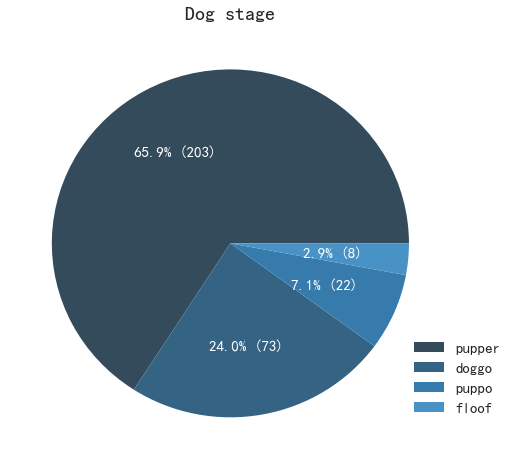

In [541]:
# 狗的地位中，四个称号的比例
fig, ax = plt.subplots(figsize=(8,8))

labels = df.stage.value_counts().index
data = df.stage.value_counts().values

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d}) ".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
#sns.set_palette("Blues_d")

ax.legend(wedges, labels,
          #title="Dog Stage",
          loc="center left",
          fontsize=15,
          bbox_to_anchor=(0.88, 0, 0.5, 0.38))

plt.setp(autotexts, size=15, weight="bold")

#ax.set_title("Dog stage", size=20)
plt.title("Dog stage", size=20)
plt.savefig('dog_stage.png',dpi=400)
plt.show()

In [542]:
df.groupby('stage')['rating_numerator'].mean()

stage
doggo     11.783784
floof     11.875000
pupper    10.622020
puppo     12.000000
Name: rating_numerator, dtype: float64

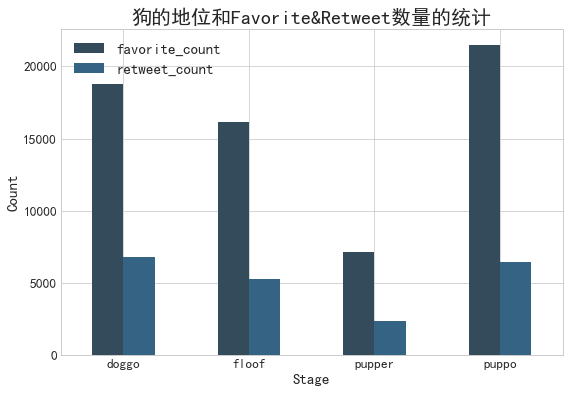

stage
doggo     18811.675676
floof     16181.777778
pupper     7176.157635
puppo     21505.681818
Name: favorite_count, dtype: float64
stage
doggo     6833.243243
floof     5269.777778
pupper    2352.285714
puppo     6434.818182
Name: retweet_count, dtype: float64


In [543]:
df.groupby('stage')['favorite_count', 'retweet_count'].mean().plot(kind='bar',
                                                                  figsize=(9,6),
                                                                  fontsize=13.5)
sns.set_palette("Set2")

plt.ylabel("Count",size=15)
plt.xlabel("Stage",size=15)
plt.title('狗的地位和Favorite&Retweet数量的统计',size=20)
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.savefig('dog_stage_c.png')
plt.show()

print(df.groupby('stage')['favorite_count'].mean())
print(df.groupby('stage')['retweet_count'].mean())

- 关于狗的地位的数据一共有336条， pupper最多，有227条，占了68%。
- 从各个地位的平均分来看，pupper最低，看来年龄较小的狗没有竞争力。pipo评分最高，年轻的狗活力无限，赢得了dog_rating推主的喜爱。doggo和floofer平均分接近，明显高于pupper。
- 从转发和喜欢数来看，pupper明显低于其他。doggo和puppo两者接近，是最高的。

### 相关性

In [544]:
# 评分越高，转发数和喜欢数越高么

#14分以上非常少，7分一下也很少，不具有明显的统计学意义
data = df[(df.rating_numerator<15)&(df.rating_numerator>1)]
score = data.rating_numerator
retweet = data.retweet_count
favorite = data.favorite_count

In [545]:
s = list(data)[:-2]
c = data.melt(id_vars=s, var_name='count')
c.rating_numerator = c.rating_numerator.apply(round)
# 四舍五入取整，查看分布趋势
c.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,count,value
0,892420643555336193,0,0,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,0,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,favorite_count,39492
1,892177421306343426,0,0,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",0,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,favorite_count,33786
2,891815181378084864,0,0,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,0,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,favorite_count,25445
3,891689557279858688,0,0,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,0,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,favorite_count,42863
4,891327558926688256,0,0,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",0,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,favorite_count,41016


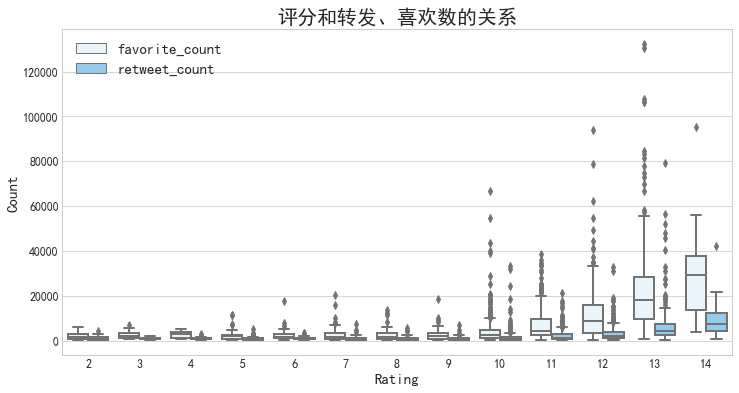

In [546]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

sns.boxplot(x='rating_numerator', y='value',data=c, hue='count',color='lightskyblue',
            linewidth=2)
#ax = sns.stripplot(x='rating_numerator', y='value',data=c, hue='count', jitter=True, color='.35')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Rating',size=15)
plt.ylabel('Count', size=15)
plt.title("评分和转发、喜欢数的关系", size=20)
plt.legend(fontsize=15)
plt.savefig('count_rate.png', dpi=200)
plt.show()

总体来看，评分越高，转发数和喜欢数的中位数也越高

In [547]:
#fig, ax = plt.subplots(1,1, figsize=(12,6))

#ax = sns.boxplot(x='rating_numerator', y='favorite_count',data=d, color='lightskyblue', linewidth=2.5)
#ax = sns.stripplot(x='rating_numerator', y='favorite_count',data=d, jitter=True, color='.35')

#ax.set_title("狗的评分和喜欢数的关系", size=20)
#plt.savefig('F_count_rate.png', dpi=200)
#axes[1] = sns.boxplot(data=data, y='retweet_count', x='rating_numerator')
#axes[1].set_title("狗的评分和转推数的关系", size=15)

In [548]:
d = df.query('rating_numerator<15 & retweet_count<25000')
d.rating_numerator = d.rating_numerator.apply(round)
#d = data[(data.favorite_count<17766)&(data.retweet_count<5142)]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


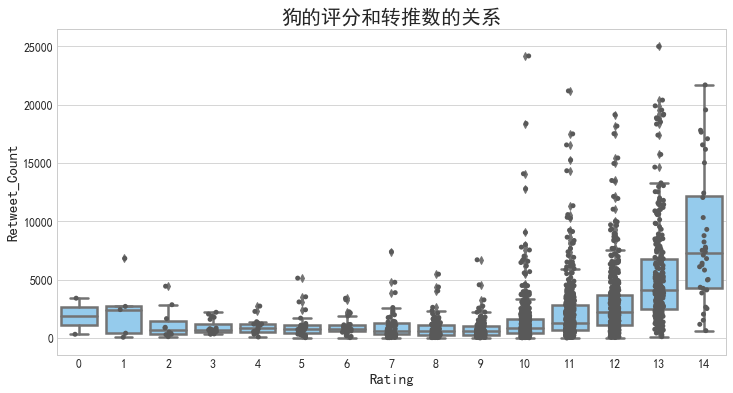

In [549]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
sns.boxplot(x='rating_numerator',  y='retweet_count',data=d, color='lightskyblue', linewidth=2.5)
sns.stripplot(x='rating_numerator',  y='retweet_count',data=d, jitter=True, color='.35')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Rating',size=15)
plt.ylabel('Retweet_Count', size=15)
plt.title("狗的评分和转推数的关系", size=20)
plt.savefig('R_count_rate.png', dpi=200)
plt.show()

In [550]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]
from scipy import stats

In [551]:
print(pearson_r(score, favorite))
print(pearson_r(score, retweet))
stats.pearsonr(score, favorite)

0.4225721305733865
0.3166993389252262


(0.4225721305733866, 3.028311752658134e-86)

- 可以看出，剔除两边的较少样本的评分后，总体来看，评分越高，喜欢数越高,但是对于评分小于7的部分，趋势不明显，主要统计的样本较少，无法看到明显的趋势。
- retweet正相关趋势更明显，这点从pearson系数也可以看出来。

In [552]:
from scipy import stats

#fig,ax = plt.subplots(figsize=(6,6))
data_nor = df[(df.favorite_count<200000)&(df.retweet_count<10000)]
r, p = stats.pearsonr(data_nor.favorite_count, data_nor.retweet_count) #"{:.1f}% ({:d}) ".format(pct, absolute)
s = 'pearsonr = {:.2f}; p={:.2f}'.format(r,p)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


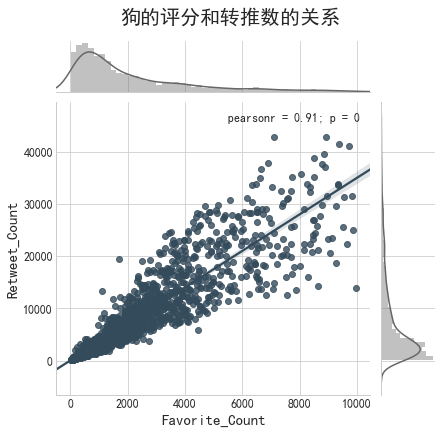

In [553]:
sns.set_palette("Blues_d")

g = sns.JointGrid(data=data_nor, x='retweet_count', y='favorite_count')
g = g.plot_joint(sns.regplot)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Favorite_Count',size=15)
plt.ylabel('Retweet_Count', size=15)
g = g.plot_marginals(sns.distplot, bins=50, color=".4")
g = g.annotate(stats.pearsonr,fontsize=12)
#g.plot(sns.regplot, sns.distplot)
#plt.title('Retweet和Favorite的相关性')
#plt.title("狗的评分和转推数的关系", size=20)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("狗的评分和转推数的关系", size=20)
plt.savefig('F_R.png', dpi=200)
plt.show()

In [554]:
r, p = stats.pearsonr(data_nor.favorite_count, data_nor.retweet_count) #"{:.1f}% ({:d}) ".format(pct, absolute)
s = 'pearsonr = {:.2f}; p={:.2f}'.format(r,p)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


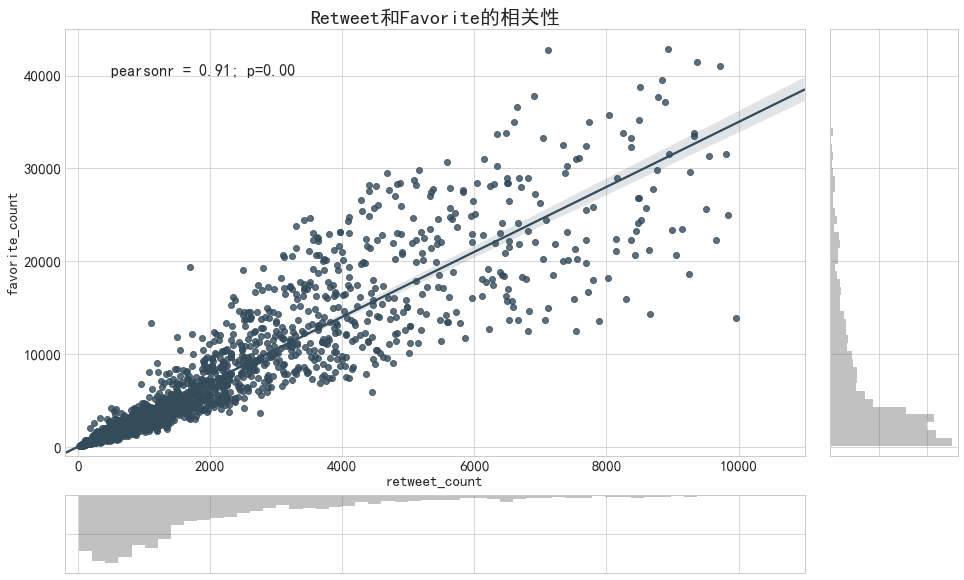

In [555]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10))
grid = plt.GridSpec(5, 6, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1], xlim=(-200,11000), ylim=(-1000,45000))
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[], ylim=(-1000,45000))#, sharey=ax_main) #,
ax_bottom = fig.add_subplot(grid[-1, 0:-1],xticklabels=[], yticklabels=[], xlim=(-200,11000))#, sharex=ax_main)

# Scatterplot on main ax
g = sns.regplot(data=data_nor, x='retweet_count', y='favorite_count', ax=ax_main)
ax_main.text(x=500,y=40000, s=s,fontsize=16)

sns.distplot(a=data_nor['retweet_count'], bins=50, color=".4",kde=False, ax=ax_bottom)
ax_bottom.set_ylim((0,200))
ax_bottom.set_xlabel('')
ax_bottom.invert_yaxis()

# histogram in the bottom
sns.distplot(a=data_nor['favorite_count'], bins=50, color=".4",ax=ax_right, kde=False, vertical=True)
ax_right.set(ylabel='')

# Decorations
ax_main.set(title='Retweet和Favorite的相关性', xlabel='retweet_count', ylabel='favorite_count')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(15)

#xlabels = ax_main.get_xticks().tolist()
#ax_main.set_xticklabels(xlabels)
plt.savefig('F_R.png', dpi=200)
plt.show()

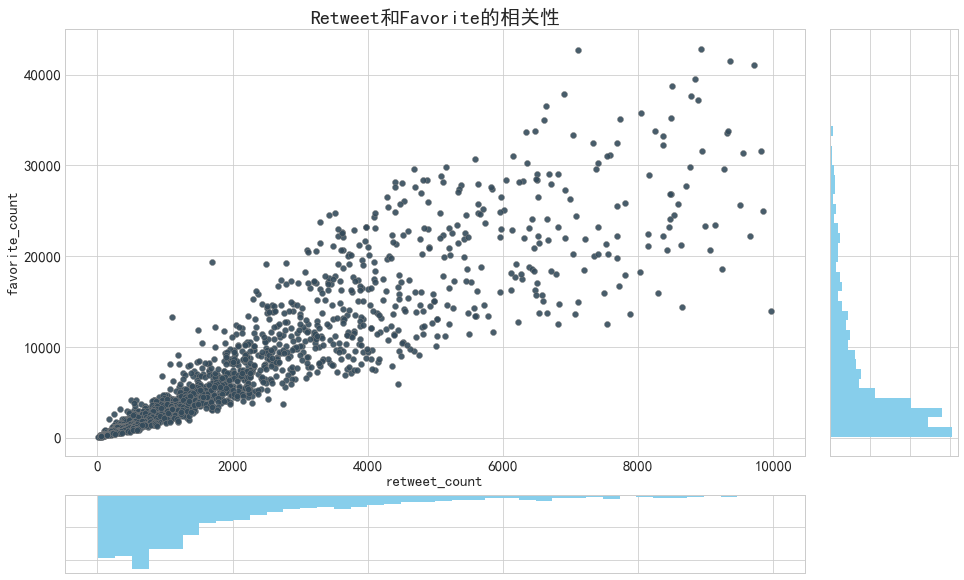

In [556]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10))
grid = plt.GridSpec(5, 6, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])#, sharey=ax_main) #,
ax_bottom = fig.add_subplot(grid[-1, 0:-1],xticklabels=[], yticklabels=[])#, sharex=ax_main)

# Scatterplot on main ax
ax_main.scatter(x='retweet_count', y='favorite_count', alpha=.9, data=data_nor, cmap="tab10", edgecolors='gray', linewidths=.5)


ax_bottom.hist(data_nor.retweet_count, 40, histtype='stepfilled', orientation='vertical', color='skyblue')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(data_nor.favorite_count, 40, histtype='stepfilled', orientation='horizontal', color='skyblue')

# Decorations
ax_main.set(title='Retweet和Favorite的相关性', xlabel='retweet_count', ylabel='favorite_count')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(15)

#xlabels = ax_main.get_xticks().tolist()
#ax_main.set_xticklabels(xlabels)
plt.show()

In [557]:
r = pearson_r(favorite, retweet)
r
from scipy import stats
stats.pearsonr(favorite, retweet)

(0.9152085927347384, 0.0)

In [558]:
degreef = len(data_nor)-2
t_value = r*np.sqrt(degreef/(1-r*r))
t_value

99.15110868352477

In [559]:
# 在这里执行统计检验
from scipy.stats import t

#计算p值
p = (1 - t.cdf(x=t_value, df=degreef))*2
p

0.0

一般来说，转发量高的，喜欢数也高，dog_rates的twitter也不例外，而且，两者的相关性非常强，pearson系数达到了0.91，p值接近于0。

Text(0.5,1,'Retweet和Favorite随时间的变化（重采样M）')

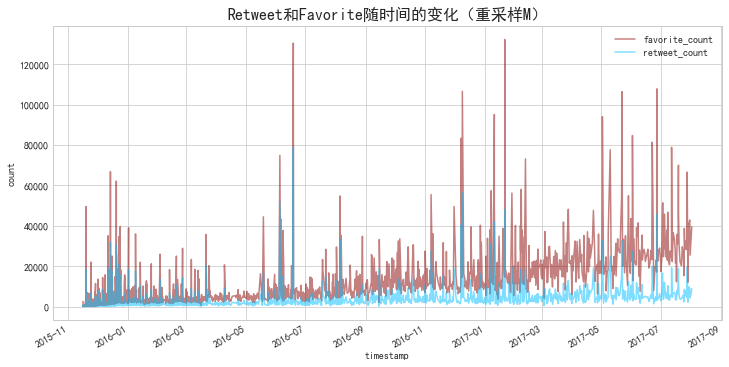

In [560]:
data.plot(y=['favorite_count','retweet_count'],
          color=['darkred','deepskyblue'],figsize=(12,6), alpha=0.5)
plt.ylabel('count')
plt.title('Retweet和Favorite随时间的变化（重采样M）', size=16)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


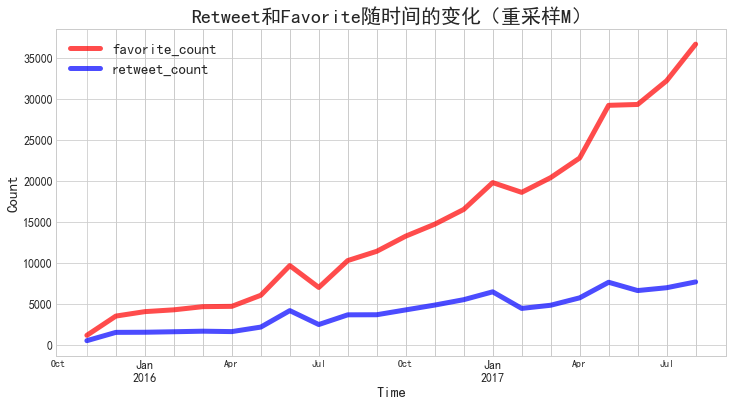

In [561]:
data.sort_index(inplace=True)
e = data[['favorite_count','retweet_count']].resample('M').mean()
e.plot(figsize=(12,6),color=['r','b'],alpha=0.7, linewidth=5)

plt.xticks(pd.date_range(e.index[0],e.index[-1]))
plt.title('Retweet和Favorite随时间的变化（重采样M）', size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Time',size=15)
plt.ylabel('Count', size=15)
plt.legend(fontsize=15)
plt.savefig('time_count.png', dpi=200)
plt.show()


更多说明或总结等

> 提示：在完成 Notebook 的所有内容之后，还需要完成两篇文本和图片组成的 PDF 报告。因为这两篇报告中只是文字和图片，不需要包含代码，你可以使用文字编辑软件，比如 Word 来完成：
- 创建一个 300-600 字的书面报告，命名为 `wrangle_report.pdf`，在该报告中简要描述你的数据整理过程。这份报告可以看作是一份内部文档，供你的团队成员查看交流。
- 创建一个 250 字以上的书面报告，命名为 `act_report.pdf`，在该报告中，你可以与读者交流观点，展示你使用整理过的数据生成的可视化图表。这份报告可以看作是一份外部文档，如博客帖子或杂志文章。

> 提示：提交项目前建议删除 Notebook 中的所有提示性文字和注释，只保留自己的 Markdown 文本和代码注释。